---
# Unit 5.4: Verlet integration for simple harmonic oscillation


- The Verlet integration for $x$ and $v$ are given
\begin{align*}
x_{n+1} & =2x_{n}-x_{n-1}+a_{n}h^{2}\\
v_{n} & =\frac{x_{n+1}-x_{n-1}}{2h}
\end{align*}

- $\{x_0,x_1\}$ are needed for Verlet method.

- Let's apply Verlet for solving Simple Harmonic Oscillation.

$$m\ddot{x}=-kx\Rightarrow a=-\omega^{2}x $$

Thus, 

\begin{align*}
x_{n+1} & =2x_{n}-x_{n-1}+a_{n}h^{2}\\
 & =2x_{n}-x_{n-1}+\left(-\omega^{2}x_{n}\right)h^{2}
\end{align*}


okay


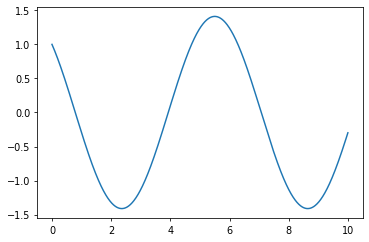

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# x_n_1 = 2. * x_n - x_n-1 + (-omega**2 * x_n) * h**2
h = 0.01 # step size for time discretization
Nt = 1000
total_time = Nt * h
omega = 1. # 
x_arr = np.zeros(Nt+1)
t_arr = np.linspace(0,total_time, Nt+1)
x0,x1 = 1.0, 0.99
x_arr[0] = x0
x_arr[1] = x1

for n in range(1,Nt):
    x_arr[n+1] = 2. * x_arr[n] - x_arr[n-1] - omega**2 * x_arr[n] * h**2 # Verlet method 
    #print (n)
    #print (x_arr[n+1])
print ("okay")
#===
fig = plt.figure( dpi = 70 ) # dots per inch
fig.set_size_inches(6,4)
plt.plot(t_arr, x_arr)

#print (x_arr)


    
# Unit 5.5: Velocity Verlet integration for SHO

---

Verlet method can be modified into Velocity-Verlet method:
\begin{align}
x_{n+1} & =x_{n}+hv_{n}+\frac{1}{2}a_{n}h^{2}\label{v-verlet_x}\\
v_{n+1} & =v_{n}+\frac{1}{2}\left(a_{n}+a_{n+1}\right)h
\end{align}





okay


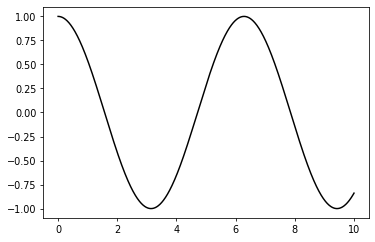

In [5]:



import numpy as np
import matplotlib.pyplot as plt

# x_n_1 = 2. * x_n - x_n-1 + (-omega**2 * x_n) * h**2
h = 0.01 # step size for time discretization
Nt = 1000
total_time = Nt * h
omega = 1. # 

x_arr = np.zeros(Nt+1)
v_arr = np.zeros(Nt+1)
a_arr = np.zeros(Nt+1)
t_arr = np.linspace(0,total_time, Nt+1)
# initial conditions
x_arr[0] = 1.0
v_arr[0] = 0.0
a_arr[0] = -omega**2. * x_arr[0]

for n in range(Nt):
    #x_arr[n+1] = 2. * x_arr[n] - x_arr[n-1] - omega**2 * x_arr[n] * h**2 # Verlet method 
    x_arr[n+1] = x_arr[n] + v_arr[n] * h + 0.5 * a_arr[n] * h**2
    a_arr[n+1] = -omega**2. * x_arr[n+1]    
    v_arr[n+1] = v_arr[n] + 0.5 * (a_arr[n] + a_arr[n+1]) * h
    
    
print ("okay")
#===
fig = plt.figure( dpi = 70 ) # dots per inch
fig.set_size_inches(6,4)
plt.plot(t_arr, x_arr,'k-')

#print (x_arr)








---
    
# Unit 5.6a: Forced oscillations -- analytical solution

---

- When applying an external force $F^{ext}(t) = F \cos(\omega_1t)$ on SHO, the equation of motion:
$$\ddot{x}+\omega_0^{2}x=\frac{F}{m}\cos(\omega_1t)$$

- Analytical solution
\begin{align*}
x\left(t\right) & =A\cos\left(\omega_{0}t\right)+B\sin\left(\omega_{0}t\right)+\frac{F}{m\left(\omega_{0}^{2}-\omega_{1}^{2}\right)}\cos\omega_{1}t\\
v\left(t\right) & =-A\omega_{0}\sin\left(\omega_{0}t\right)+B\omega_{0}\cos\left(\omega_{0}t\right)-\omega_{1}\frac{F}{m\left(\omega_{0}^{2}-\omega_{1}^{2}\right)}\sin\omega_{1}t
\end{align*}

- At $t=0$
\begin{align*}
x_{0} & =A+\frac{F}{m\left(\omega_{0}^{2}-\omega_{1}^{2}\right)}\Rightarrow A=x_{0}-\frac{F}{m\left(\omega_{0}^{2}-\omega_{1}^{2}\right)}\\
v_{0} & =B\omega_{0}\Rightarrow B=v_{0}/\omega_{0}
\end{align*}
- Initial conditions $\{x_0,v_0\}$ are used to find $A$ and $B$.

$$x\left(t\right)=x_{0}\cos\omega_{0}t+\left(\frac{v_{0}}{\omega_{0}}\right)\sin\omega_{0}t+\frac{F}{m\left(\omega_{0}^{2}-\omega_{1}^{2}\right)}\left(\cos\omega_{1}t-\cos\omega_{0}t\right)$$

- Let's find the solution for the following parameters:
\begin{align*}
\omega_{0} & =2\pi/1\;{\rm rad/s}\\
\omega_{1} & =2\pi/10\;{\rm rad/s}\\
F & =10\;{\rm kg\cdot m/s^{2}}\\
m & =1\;{\rm kg}\\
x_{0} & =1\;{\rm m}\\
v_{0} & =0\;{\rm m/s}
\end{align*}



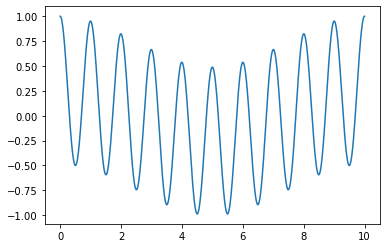

In [19]:
import numpy as np
import matplotlib.pyplot as plt

F = 10. #10.
m = 1.
w0 = 2. * np.pi
w1 = 2. * np.pi /10.
x0 = 1.
v0 = 0.

#===
t_arr = np.linspace(0,10.,1000)
x_arr = x0 * np.cos(w0 * t_arr) + v0/w0 * np.sin(w0 * t_arr) + F/(m* (w0**2. - w1**2))*(np.cos(w1*t_arr) - np.cos(w0*t_arr)) 
    
plt.plot(t_arr, x_arr)
    






okay


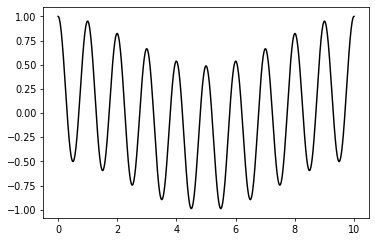

In [25]:



import numpy as np
import matplotlib.pyplot as plt

# x_n_1 = 2. * x_n - x_n-1 + (-omega**2 * x_n) * h**2
h = 0.01 # step size for time discretization
Nt = 1000
total_time = Nt * h
omega = 1. # 

x_arr = np.zeros(Nt+1)
v_arr = np.zeros(Nt+1)
a_arr = np.zeros(Nt+1)
t_arr = np.linspace(0,total_time, Nt+1)
# initial conditions
x_arr[0] = 1.0
v_arr[0] = 0.0
F = 10.
m = 1.
w0 = 2. * np.pi
w1 = 2. * np.pi /10.

a_arr[0] = -w0**2. * x_arr[0] + F/m * np.cos(w1 * t_arr[0])

for n in range(Nt):
    #x_arr[n+1] = 2. * x_arr[n] - x_arr[n-1] - omega**2 * x_arr[n] * h**2 # Verlet method 
    x_arr[n+1] = x_arr[n] + v_arr[n] * h + 0.5 * a_arr[n] * h**2
    a_arr[n+1] = -w0**2. * x_arr[n+1] + F/m * np.cos(w1 * t_arr[n+1])    
    v_arr[n+1] = v_arr[n] + 0.5 * (a_arr[n] + a_arr[n+1]) * h
    
    
print ("okay")
#===
fig = plt.figure( dpi = 70 ) # dots per inch
fig.set_size_inches(6,4)
plt.plot(t_arr, x_arr,'k-')

#print (x_arr)
















## `Example Q1 (One-dimensional projectile motion)`


A rock of mass $m=1\;{\rm kg}$ is tossed vertically from the ground $(y=0)$ into the air at time $t=0$. The initial velocity of the rock is $v=10\;{\rm m/s}$. The motion is affected by the gravity and a drag force due to air resistance, $f_{drag}=-bv$. The gravitational acceleration $g= 9.8{\rm m/s^{2}}$ and the drag coefficient
$b=1\;{\rm kg/s}$. Apply Runge-Kutta method (RK2) to find numerically the rock's trajectory. Assume the rock reaches its highest point $y = h_{max}$ at time $t_1$ and returns to the ground $y = 0$ at time $t_2$. Please find $h_{max}$, $t_1$ and $t_2$.

The equation of motion is written as:

$$m\ddot{y}=-mg-b\dot{y}$$


(Hint)

ODEs for $y$ and $v$:

\begin{align*}
\frac{dy}{dt} & =v\equiv f^{y}\\
\frac{dv}{dt} & =-g-\frac{b}{m}v\equiv f^{v}
\end{align*}




-----
##  `Example Q2. (Deflection of a simple beam)`

A simply supported beam of length $L$ is subjected to an evenly distributed load (force per unit length) $q\left(x\right)=q_{0}$. According to the beam theory, the deflection of the beam $u$ obeys

$$\frac{d^{2}u}{dx^{2}}=-\frac{M}{EI}$$


The bending moment is found to be 
$$M=\frac{q_{0}}{2}x\left(L-x\right)$$

The boundary conditions are given $u_{left}=u_{right}=0$. Please find the numerical solution for the deflection $u\left(x\right)$. Here, we assume $L=1\;{\rm meter},$$q_{0}={\rm 1\;N/m},$ and the flexural rigidity $EI=1\;{\rm N\cdot m}$. 

(Hint) Discretize the equation into $A\vec{u} = \vec{b}$ and then solve the deflection field using $\vec{u}$= np.linalg.solve(A,$\vec{b}$).











In [ ]:
h_max =   3.1075 m
t1 =   0.7000 seconds
162
t2 =   1.6200 seconds



